In [10]:
from qiskit import BasicAer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_histogram
from typing import List, Tuple
import numpy as np
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
# create a QUBO
qubo = QuadraticProgram()
for i in range(6):
    st = 'x{}'.format(i+1)
    qubo.binary_var(st)
for i in range(6):
    st = 'y{}'.format(i+1)
    qubo.binary_var(st)
for i in range(6):
    st = 'z{}'.format(i+1)
    qubo.binary_var(st)

In [12]:
with open('Graph_data.pkl', 'rb') as f:
    gdata = pickle.load(f)
edge_lists = gdata['edge_list']

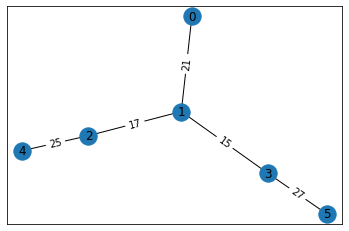

In [13]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5])
G.add_weighted_edges_from([(0, 1, 21), (1, 2, 17), (1, 3, 15), (2, 4, 25), (3, 5, 27)])
labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [15]:
import scipy.sparse

# G = nx.DiGraph()
# G.add_nodes_from(range(9))
# G.add_weighted_edges_from(edge_lists)

# nodelist = list(G)
# A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight="weight", format="csr")
# n, m = A.shape
# diags = A.sum(axis=0)  # 1 = outdegree, 0 = indegree
# D = scipy.sparse.spdiags(diags.flatten(), [0], m, n, format="csr")

# L = (A - D).todense()

L = np.array([[ 21, -21,   0,   0,   0,   0],
        [-21,  53, -17, -15,   0,   0],
        [  0, -17,  42,   0, -25,   0],
        [  0, -15,   0,  42,   0, -27],
        [  0,   0, -25,   0,  25,   0],
        [  0,   0,   0, -27,   0,  27]])
maxv = np.abs(L).max()
L = L / maxv
L = L * np.pi

# print((A - D).todense())
# [[-2  1  1]

coeff = {}
for i in range(6):
    for j in range(6):
        coeff['x{}x{}'.format(i+1,j+1)] = L[i,j] + 1
        coeff['y{}y{}'.format(i+1,j+1)] = L[i,j] + 1
        coeff['z{}z{}'.format(i+1,j+1)] = L[i,j] + 1
        if i == j:
            coeff['x{}x{}'.format(i+1,j+1)] += 1
            coeff['y{}y{}'.format(i+1,j+1)] += 1
            coeff['z{}z{}'.format(i+1,j+1)] += 1
            
        coeff['x{}y{}'.format(i+1,i+1)] = 2
        coeff['x{}z{}'.format(i+1,i+1)] = 2
        coeff['y{}z{}'.format(i+1,i+1)] = 2

In [16]:
quad = {}
for k in list(coeff.keys()):
    xvar1 = k[:2]
    xvar2 = k[2:]
    quad[(xvar1, xvar2)] = coeff[k]

In [17]:
# quadz

In [18]:
qubo.minimize(linear=[-8 for i in range(6*3)], quadratic=quad)
print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 8 x1 - 8 x2 - 8 x3 - 8 x4 - 8 x5 - 8 x6 - 8 y1 - 8 y2 - 8 y3 - 8 y4
      - 8 y5 - 8 y6 - 8 z1 - 8 z2 - 8 z3 - 8 z4 - 8 z5 - 8 z6 + [
      6.489563989637 x1^2 - 0.979127979274 x1*x2 + 4 x1*x3 + 4 x1*x4 + 4 x1*x5
      + 4 x1*x6 + 4 x1*y1 + 4 x1*z1 + 10.283185307180 x2^2
      - 0.030722649889 x2*x3 + 0.443480014804 x2*x4 + 4 x2*x5 + 4 x2*x6
      + 4 x2*y2 + 4 x2*z2 + 8.979127979274 x3^2 + 4 x3*x4 - 1.927533308660 x3*x5
      + 4 x3*x6 + 4 x3*y3 + 4 x3*z3 + 8.979127979274 x4^2 + 4 x4*x5
      - 2.401735973353 x4*x6 + 4 x4*y4 + 4 x4*z4 + 6.963766654330 x5^2 + 4 x5*x6
      + 4 x5*y5 + 4 x5*z5 + 7.200867986676 x6^2 + 4 x6*y6 + 4 x6*z6
      + 6.489563989637 y1^2 - 0.979127979274 y1*y2 + 4 y1*y3 + 4 y1*y4 + 4 y1*y5
      + 4 y1*y6 + 4 y1*z1 + 10.283185307180 y2^2 - 0.030722649889 y2*y3
      + 0.443480014804 y2*y4 + 4 y2*y5 + 4 y2*y6 + 4 y2*z2 + 8.979127979274 y3^2
      + 4 y3*y4 - 1.9

In [19]:
op, offset = qubo.to_ising()
print("offset: {}".format(offset))
print("operator:")
print(op)

offset: -13.164135038860554
operator:
-0.5 * ZIIIIIIIIIIIIIIIII
- 0.4999999999999998 * IZIIIIIIIIIIIIIIII
+ 0.5 * ZZIIIIIIIIIIIIIIII
- 0.5000000000000003 * IIZIIIIIIIIIIIIIII
- 0.3002169966690983 * ZIZIIIIIIIIIIIIIII
+ 0.5 * IZZIIIIIIIIIIIIIII
- 0.5000000000000002 * IIIZIIIIIIIIIIIIII
+ 0.5 * ZIIZIIIIIIIIIIIIII
- 0.24094166358249836 * IZIZIIIIIIIIIIIIII
+ 0.5 * IIZZIIIIIIIIIIIIII
- 0.5000000000000002 * IIIIZIIIIIIIIIIIII
+ 0.5 * ZIIIZIIIIIIIIIIIII
+ 0.5 * IZIIZIIIIIIIIIIIII
+ 0.05543500185050099 * IIZIZIIIIIIIIIIIII
- 0.0038403312360988373 * IIIZZIIIIIIIIIIIII
- 0.4999999999999998 * IIIIIZIIIIIIIIIIII
+ 0.5 * ZIIIIZIIIIIIIIIIII
+ 0.5 * IZIIIZIIIIIIIIIIII
+ 0.5 * IIZIIZIIIIIIIIIIII
+ 0.5 * IIIZIZIIIIIIIIIIII
- 0.12239099740929871 * IIIIZZIIIIIIIIIIII
- 0.5 * IIIIIIZIIIIIIIIIII
+ 0.5 * ZIIIIIZIIIIIIIIIII
- 0.4999999999999999 * IIIIIIIZIIIIIIIIII
+ 0.5 * IZIIIIIZIIIIIIIIII
+ 0.5 * IIIIIIZZIIIIIIIIII
- 0.5000000000000003 * IIIIIIIIZIIIIIIIII
+ 0.5 * IIZIIIIIZIIIIIIIII
- 0.3002169966690983 

In [20]:
qp = QuadraticProgram()
qp.from_ising(op, offset, linear=True)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 4.755218005181 x0 - 2.858407346410 x1 - 3.510436010363 x2
      - 3.510436010363 x3 - 4.518116672835 x4 - 4.399566006662 x5
      - 4.755218005181 x6 - 2.858407346410 x7 - 3.510436010363 x8
      - 3.510436010363 x9 - 4.518116672835 x10 - 4.399566006662 x11
      - 4.755218005181 x12 - 2.858407346410 x13 - 3.510436010363 x14
      - 3.510436010363 x15 - 4.518116672835 x16 - 4.399566006662 x17 + [
      - 0.979127979274 x0*x1 + 4 x0*x2 + 4 x0*x3 + 4 x0*x4 + 4 x0*x5 + 4 x0*x6
      + 4 x0*x12 - 0.030722649889 x1*x2 + 0.443480014804 x1*x3 + 4 x1*x4
      + 4 x1*x5 + 4 x1*x7 + 4 x1*x13 + 4 x2*x3 - 1.927533308660 x2*x4 + 4 x2*x5
      + 4 x2*x8 + 4 x2*x14 + 4 x3*x4 - 2.401735973353 x3*x5 + 4 x3*x9 + 4 x3*x15
      + 4 x4*x5 + 4 x4*x10 + 4 x4*x16 + 4 x5*x11 + 4 x5*x17
      - 0.979127979274 x6*x7 + 4 x6*x8 + 4 x6*x9 + 4 x6*x10 + 4 x6*x11
      + 4 x6*x12 - 0.030722649889 x7*x8 + 0.443480014

In [21]:
# from qiskit import IBMQ
# from qiskit.providers.ibmq import least_busy
# ibm_token = '49670f985b02b984d52967234a8d86aa4f49519731f6a3b1b9b5c2afffde9d8f34d46e6df77cf8ec96e1adf36aadeaf8a6c4a73665cfb2945627ed954451f473' # https://quantum-computing.ibm.com/account
# ibmq_account = IBMQ.enable_account(ibm_token)
# ibmq_provider = IBMQ.get_provider(hub='ibm-q-skku', group='snu', project='snu-graduate')

In [22]:
# ibmq_backend = ibmq_provider.get_backend('ibm_washington')
backend = BasicAer.get_backend('qasm_simulator')

In [27]:
algorithm_globals.random_seed = 10598
algorithm_globals.massive=True
quantum_instance = QuantumInstance(
    backend,
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)
qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0.5, 0.5])
exact_mes = NumPyMinimumEigensolver()

In [28]:
qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA
exact = MinimumEigenOptimizer(exact_mes)  # using the exact classical numpy minimum eigen solver

In [29]:
qaoa_result = qaoa.solve(qubo)
print(qaoa_result)

optimal function value: -23.49507468541841
optimal value: [0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
status: SUCCESS


In [30]:
np.array(qaoa_result.x).reshape(-1,6)

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0.]])

In [31]:
exact_result = exact.solve(qubo)
print(exact_result.x.reshape(-1,6))

AttributeError: 'MinimumEigenOptimizationResult' object has no attribute 'reshape'

In [34]:
exact_result.x.reshape(-1,6)

array([[1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.]])

In [ ]:
# print("variable order:", [var.name for var in qaoa_result.variables])
# for s in qaoa_result.samples:
#     print(s)

In [ ]:
# def get_filtered_samples(
#     samples: List[SolutionSample],
#     threshold: float = 0,
#     allowed_status: Tuple[OptimizationResultStatus] = (OptimizationResultStatus.SUCCESS,),
# ):
#     res = []
#     for s in samples:
#         if s.status in allowed_status and s.probability > threshold:
#             res.append(s)

#     return res

In [ ]:
# filtered_samples = get_filtered_samples(
#     qaoa_result.samples, threshold=0.005, allowed_status=(OptimizationResultStatus.SUCCESS,)
# )
# for s in filtered_samples:
#     print(s)

In [ ]:
# fvals = [s.fval for s in qaoa_result.samples]
# probabilities = [s.probability for s in qaoa_result.samples]

In [ ]:
# np.mean(fvals)

In [ ]:
# np.std(fvals)

In [ ]:
# samples_for_plot = {
#     " ".join(f"{qaoa_result.variables[i].name}={int(v)}" for i, v in enumerate(s.x)): s.probability
#     for s in filtered_samples
# }
# samples_for_plot

In [ ]:
# plot_histogram(samples_for_plot)

In [ ]:
# rqaoa = RecursiveMinimumEigenOptimizer(qaoa, min_num_vars=1, min_num_vars_optimizer=exact)

In [ ]:
# rqaoa_result = rqaoa.solve(qubo)
# print(rqaoa_result)

In [ ]:
# filtered_samples = get_filtered_samples(
#     rqaoa_result.samples, threshold=0.005, allowed_status=(OptimizationResultStatus.SUCCESS,)
# )

In [ ]:
# samples_for_plot = {
#     " ".join(f"{rqaoa_result.variables[i].name}={int(v)}" for i, v in enumerate(s.x)): s.probability
#     for s in filtered_samples
# }
# samples_for_plot

In [ ]:
# plot_histogram(samples_for_plot)